<h1>Marketing Mix Modelling<h1>

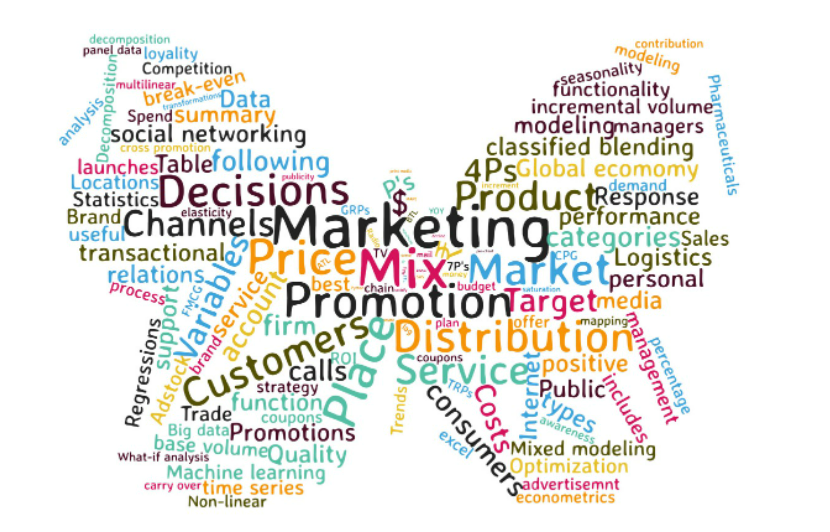

Modelowanie marketing mix (MMM) lub modelowanie media mix to podejście analityczne, w którym wykorzystuje się techniki statystyczne do ilościowego określenia wpływu różnych taktyk marketingowych (Market Mix) w celu optymalizacji i prognozowania taktyk promocyjnych w odniesieniu do przychodów ze sprzedaży lub zysku.

Identyfikuje wzorce w danych sprzedażowych i wykorzystuje je do obliczenia równania statystycznego - "modelu", który przedstawia zależności między różnymi czynnikami sprawczymi a KPI. Osiąga się to poprzez ocenę korelacji KPI z wszystkimi kluczowymi czynnikami sprawczymi. Siła tych korelacji  określa, w jaki sposób każdy czynnik wpływa na 
sprzedaż oraz zwrot z inwetycji(tzw. ROI-return of investment)


<h2>Wykorzystana metoda<h2>

Wykorzystam tutaj najczęściej stosowaną w badaniu MMM ale i najczesciej stosowaa w ekonometrii zwykłą metodę najmniejszych kwadratów (OLS)


<h2>Środowisko pracy<h2>

Najpopularniejszym narzedziem programistycznym do tworzenia modeli jest R. W Pythonie oczywiście coraz łatwiej mozna równiez 
stworzyć modele, jednak dlatego iz personalnie pracuje w R oraz większosc moich projektów jest w Pythonie(jako że ten język zgłębiam hobbystycznie),
przedstawie ten skrypt mw programie R.Chce jednak by mógł on ałuzyc jako poradnik i pomoc dla czytających. Cenię sobie estetyke i mozliwosc dodawania
tłumaczeń i ładnych komentarzy w Jupyter Notebook. Dlatego ponizej znajdziesz instrukcję, jak korzystac z R w JN :)

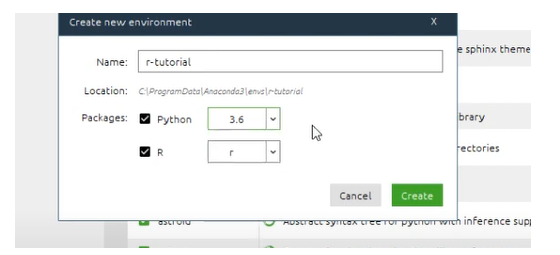

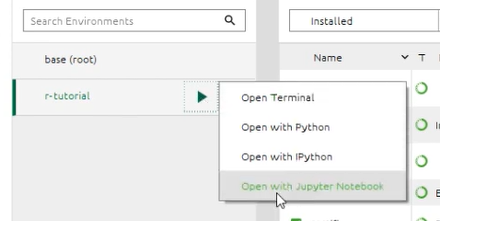

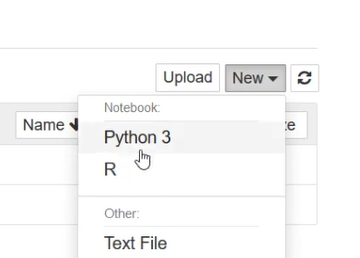

<h2>Cel<h2>

Każdy wiersz w danych opisuje różne cechy charakterystyczne różnych metod marketingowych produktu o łącznej liczbie sprzedanych sztuk w tygodniu (1 tydzień - 1 wiersz).

Naszym celem jest przeanalizowanie tych danych i zbudowanie modelu ekonometrycznego, odpowiadajacego na pytanie, co ma największy wpływ na sprzedaż danego produktu.

<h2>Pobieranie danych<h2>

Dane marketingowe dotyczące takich aspektów jak budżet i sprzedaż to oczywiście dane chronione. Przygotowując ten projekt nie mogłma niestety wykorzystać danych  z mojej firmy ponieważ są one tajne i nalezy zachować szacunek dla klienta. Szukając danych trafiłam ciekawy zbiór na kaggle:
https://www.kaggle.com/code/veer06b/multi-linear-regression-for-beginners/data

Postaram się go wykorzystać mimo że jest mały wykorzystac jego potencjał i różne techniki MMM.



In [143]:
install.packages("dplyr")

library(dplyr)

also installing the dependency 'rlang'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
rlang 0.4.11  1.0.2              TRUE
dplyr  1.0.6  1.0.8              TRUE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\weron\Anaconda3\envs\r-tutorial\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\weron\Anaconda3\envs\r-tutorial\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\weron\AppData\Local\Temp\RtmpIjTtVj\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:Hmisc':

    src, summarize

The following object is masked from 'package:ggplot2':

    vars

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [138]:
dane.df <- read.csv2("C:/Users/weron/OneDrive/Pulpit/Python finance/job_project/mmm/mktmixx.csv", header=TRUE, sep=",")

tail(dane.df)

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
99,19126,15.64263,280,38.735,,0,182.47169,2.80214,
100,18335,15.95863,292,29.485,,0,71.61151,3.08540,
101,19054,15.64263,NaN,48.611,,0.054209246,135.09345,2.65688,
102,18198,15.95863,NaN,29.323,,0.04,176.95804,2.92802,
103,20495,15.64263,NaN,50.935,,0.061,164.52741,2.53958,
104,18169,16.28102,NaN,46.169,,0.06053496,162.12822,2.66790,


Wyodrebnie od razu kolumny z kampaniami, żeby zobaczyć czy przydadza mi się do analizy i czy danych będzie więcej, czy raczej mniej.

In [139]:
dane.df$Website_Campaign_Facebook <- ifelse(dane.df$Website_Campaign=="Facebook", 1, 0)
dane.df$Website_Campaign_Twitter <- ifelse(dane.df$Website_Campaign=="Twitter", 1, 0)
dane.df$Website_Campaign <- ifelse(dane.df$Website_Campaign=="Website Campaign", 1, 0)

dane.df$NewspaperInserts <- ifelse(dane.df$Website_Campaign=="Insert", 1, 0)

In [140]:
tail(dane.df)

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign,Website_Campaign_Facebook,Website_Campaign_Twitter
99,19126,15.64263,280,38.735,0,0,182.47169,2.80214,0,0,0
100,18335,15.95863,292,29.485,0,0,71.61151,3.08540,0,0,0
101,19054,15.64263,NaN,48.611,0,0.054209246,135.09345,2.65688,0,0,0
102,18198,15.95863,NaN,29.323,0,0.04,176.95804,2.92802,0,0,0
103,20495,15.64263,NaN,50.935,0,0.061,164.52741,2.53958,0,0,0
104,18169,16.28102,NaN,46.169,0,0.06053496,162.12822,2.66790,0,0,0


<h2>Statystyki podsumowujace <h2>

Statystyki podsumowujące
Spójrzmy na Statystyki zbiorcze danych marketingowych. Zawierają one takie informacje, jak średnia, std, kwartyl1, kwartyl2, kwartyl3, wartości minimalne i maksymalne każdej z cech liczbowych w ramce danych marketingowych.

In [141]:
summary(dane.df)

  NewVolSales      Base_Price         Radio          InStore   NewspaperInserts
 Min.   :17431   Min.   : 1.549   Min.   :  0.0   10.782 : 1   Min.   :0       
 1st Qu.:19049   1st Qu.:15.029   1st Qu.:235.0   11.716 : 1   1st Qu.:0       
 Median :19944   Median :15.333   Median :278.5   13.118 : 1   Median :0       
 Mean   :20171   Mean   :15.173   Mean   :256.7   13.524 : 1   Mean   :0       
 3rd Qu.:20943   3rd Qu.:15.643   3rd Qu.:313.2   13.659 : 1   3rd Qu.:0       
 Max.   :24944   Max.   :16.281   Max.   :399.0   13.786 : 1   Max.   :0       
                                  NA's   :4       (Other):98                   
        Discount        TV             Stout       Website_Campaign
 0          :61   Min.   : 37.66   Min.   :1.819   Min.   :0       
 0.045      : 3   1st Qu.:118.40   1st Qu.:2.316   1st Qu.:0       
 0.026764736: 1   Median :139.01   Median :2.502   Median :0       
 0.033052697: 1   Mean   :148.21   Mean   :2.546   Mean   :0       
 0.034482759: 1   3r

In [144]:
dane.df %>% summarise_all(~ sum(is.na(.)))

NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign,Website_Campaign_Facebook,Website_Campaign_Twitter
0,0,4,0,0,0,0,0,0,0,0


<h2>Spostrzeżenia<h2>

Patrząc na wydruki, można zauważyć, że:

*mamy 4 brakujące wartości w ramach cechy Radio.

*Zakres punktów danych Radio jest stosunkowo duży.

*InStore ma wysoką wartość std, można się więc spodziewać wartości odstających.

*Mediana dla cechy Discount wynosi 0, należy się temu przyjrzeć.

*Średnia cechy Stout wynosi 2,55, wygląda na to, że średnio w ciągu tygodnia zapas jest wyczerpany 2,5 raza.

*Widzimy, że mamy wartości null -jedynie  w cesze: Radio.

<h2>Usuwanie wartosci NA <h2>

Zamiast usuwać warości NA w zmiennej Radio,decyduje się na zamianę tych wartości na mediane.

In [145]:
dane.df$Radio[is.na(dane.df$Radio)] <- median(dane.df$Radio, na.rm=TRUE)

<h2>Sprawdzanie rodzaju zmiennych<h2>

In [146]:
str(dane.df)

'data.frame':	104 obs. of  11 variables:
 $ NewVolSales              : int  19564 19387 23889 20055 20064 19481 19509 19033 20498 19509 ...
 $ Base_Price               : num  15 15 14.6 15.3 15.6 ...
 $ Radio                    : num  245 314 324 298 279 259 235 290 315 318 ...
 $ InStore                  : Factor w/ 104 levels "10.782","11.716",..: 7 8 101 10 80 23 55 11 84 44 ...
 $ NewspaperInserts         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Discount                 : Factor w/ 42 levels "0","0.026764736",..: 1 1 18 1 12 1 1 1 5 12 ...
 $ TV                       : num  101.8 76.7 131.6 119.6 103.4 ...
 $ Stout                    : num  2.28 2.22 2.01 2.2 1.82 ...
 $ Website_Campaign         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Website_Campaign_Facebook: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Website_Campaign_Twitter : num  0 0 0 0 0 0 0 0 0 0 ...


Spostrzeżenia:

Discount oraz InStore musza byc zamienione na zmienne numeryczne.

In [147]:
dane.df$InStore<-as.numeric(dane.df$InStore)

dane.df$Discount<-as.numeric(dane.df$Discount)


<h1>Zmienne objasniania:Sprzedaż<h1>

<h2>Normalnosc rozkladu<h2>

Na początku zajmę się analizą normalności rozkładu zmiennej objaśnianej.Potem przejde do zmiennych objasniajacych.Zbadam normalnosc rozkladu
tych zmiennych .Rozklad normalny to najważniejszy rozkład prawdopodobieństwa w statystyce, ponieważ dokładnie opisuje rozkład wartości dla wielu zjawisk naturalnych.

Warto przeksztlalcic zmienne do rozkladu normalnego poniewaz takie dane lepiej oddadza sile korelacji zmiennych.

<h3>Po czym poznac ze rozklad jest normalny?<h3>


Kurtoza:
Kurtoza jest miarą tego, czy dane są mocno lub lekko ogoniaste w stosunku do rozkładu normalnego.
Zbiory danych o wysokim Zbiory danych o niskiej kurtozie mają zazwyczaj lekkie ogony lub nie mają wartości odstających.
ROZKLAD NORMALNY dla k=3

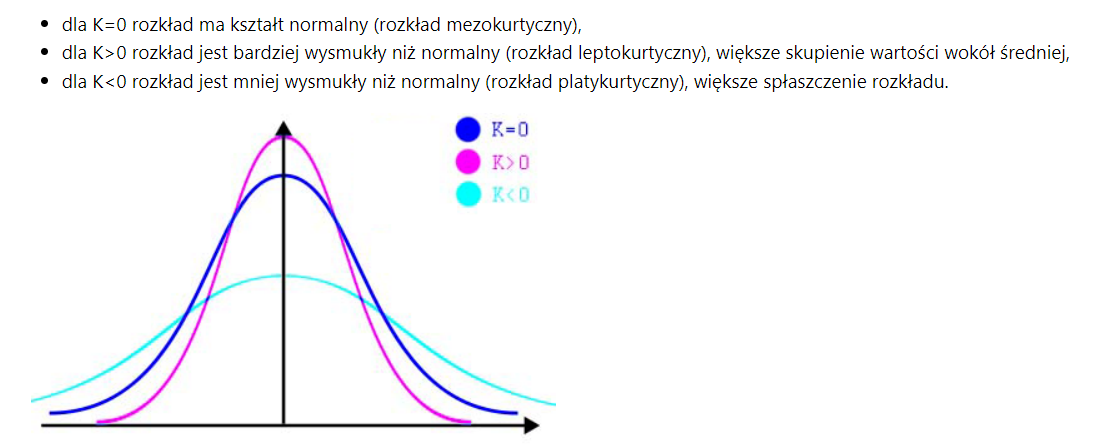

Skośność:
Skośność jest miarą symetrii, a dokładniej - braku symetrii. Rozkład lub zbiór danych jest symetryczny, jeśli wygląda tak samo na lewo i na prawo od punktu środkowego.
Wartość skośności dla rozkładu normalnego wynosi zero, a wszelkie dane symetryczne powinny mieć skośność bliską zeru. Ujemne wartości skośności oznaczają dane, które są skośne w lewo, a dodatnie wartości skośności - dane, które są skośne w prawo.


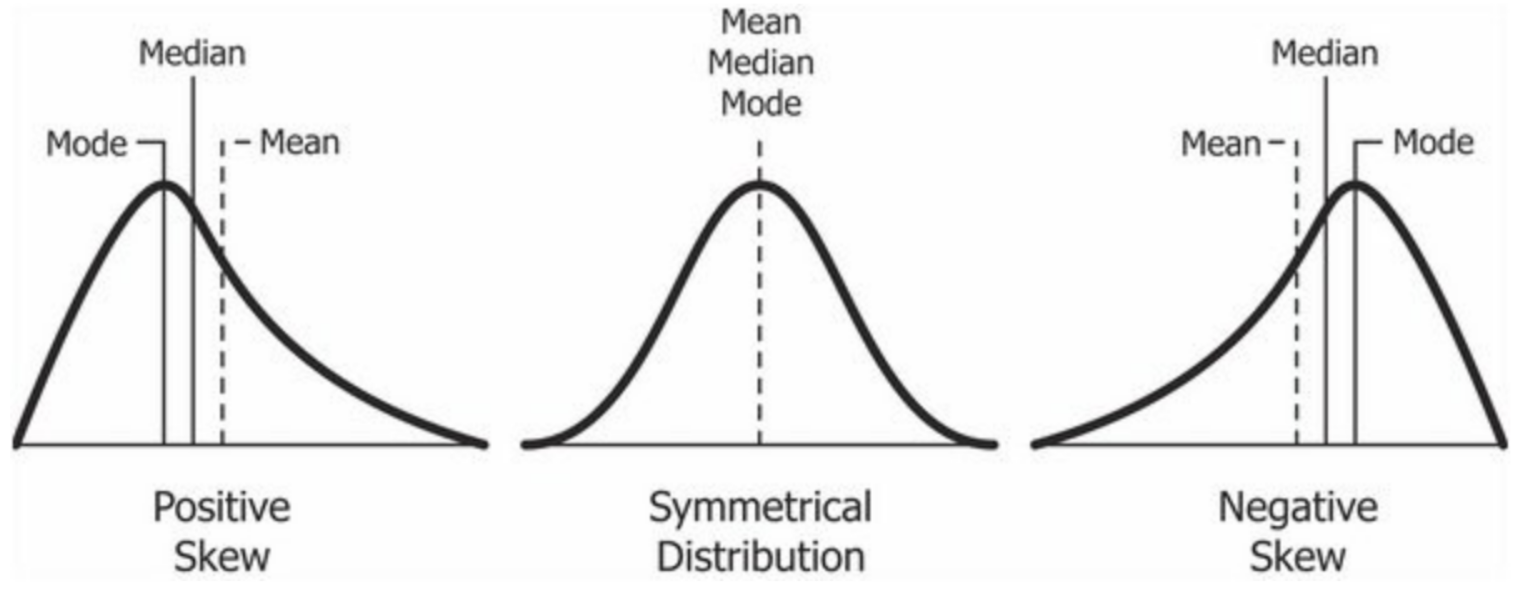

In [148]:
skewness(dane.df$NewVolSales)

kurtosis(dane.df$NewVolSales)

[1] 0.9588932

[1] 3.711694

Skosnosc:rozklad jest prawo-skosny ma prawy dlugi ogon.Kurtoza:trioche wieksza niz w typowym rozkladzie normalnym ale niewile.



<h3>Test na normalność rozkłądu<h3>

Biblioteka moments udostępnia również funkcję jarque.test(), która wykonuje test dobroci dopasowania, określający, czy dane z próby mają skośność i kurtozę odpowiadające rozkładowi normalnemu, czy też nie. Hipotezy zerowe i alternatywne tego testu są następujące:

Hipoteza zerowa: Zbiór danych ma skośność i kurtozę odpowiadające rozkładowi normalnemu.

Hipoteza alternatywna: Zestaw danych wykazuje skośność i kurtozę, które nie odpowiadają rozkładowi normalnemu.

In [11]:
install.packages("moments")
library(moments)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'moments' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"

In [149]:
jarque.test(dane.df$NewVolSales)


	Jarque-Bera Normality Test

data:  dane.df$NewVolSales
JB = 18.132, p-value = 0.0001155
alternative hypothesis: greater


Wartość p testu wynosi 0.0001155. Ponieważ wartość ta jest mniejsza niż α = .05, odrzucamy hipotezę zerową. Mamy wystarczające dowody, aby stwierdzić, że ten zbiór danych ma skośność i kurtozę różniące się od rozkładu normalnego. Potwierdzmy to w koncu histogramem!

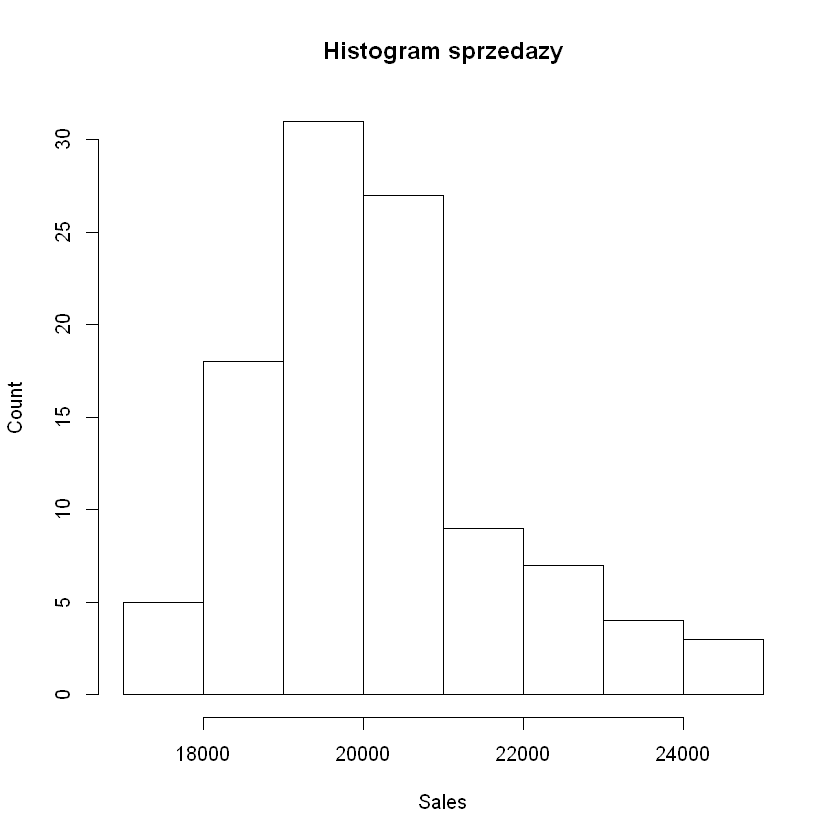

In [150]:

hist(dane.df$NewVolSales,
        main="Histogram sprzedaży",
        xlab="Sales",
        ylab="Count" )

No i widać, że potwierdza się to, co zbadałam powyżej:

* rozkłąd jest prawokurtyczny
* nie jest normalny

<h2>Narysujmy histogramy wszystkich zmiennych<h2>

In [14]:

install.packages("Hmisc")
library(Hmisc)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'Hmisc' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.

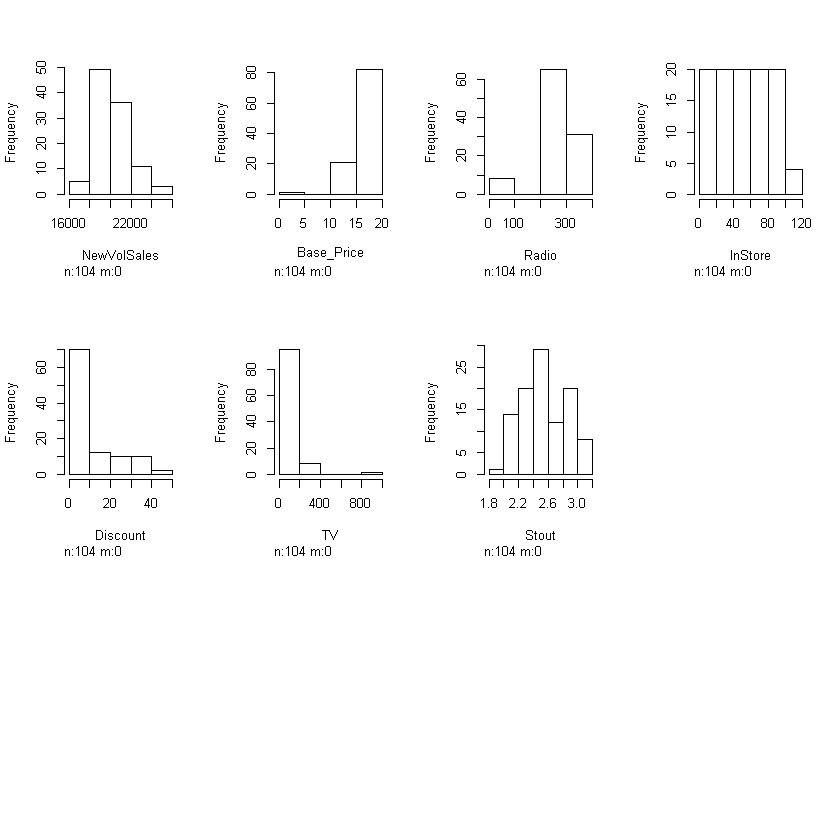

In [151]:
hist.data.frame(dane.df)

Widzimy ze w wiekszosci (zmienna Stout wydaje sie najbardziej zblizona do r.norm),zmienne nie maja rozkladu normalnego.To da się naprawic-co przedstawię za pewna chwilę.

<h2>Boxploty<h2>

<h3>Jak zinterpretować wykres pudełkowy w R?<h3>



Ramka boxplotu zaczyna się w pierwszym kwartylu (25%), a kończy w trzecim (75%). W związku z tym ramka reprezentuje 50% środkowych danych, a wewnątrz niej znajduje się linia reprezentująca medianę. Po każdej stronie ramki narysowany jest odcinek do najdalszych danych, bez liczenia wartości odstających, które, jeśli istnieją, są przedstawiane za pomocą kółek.

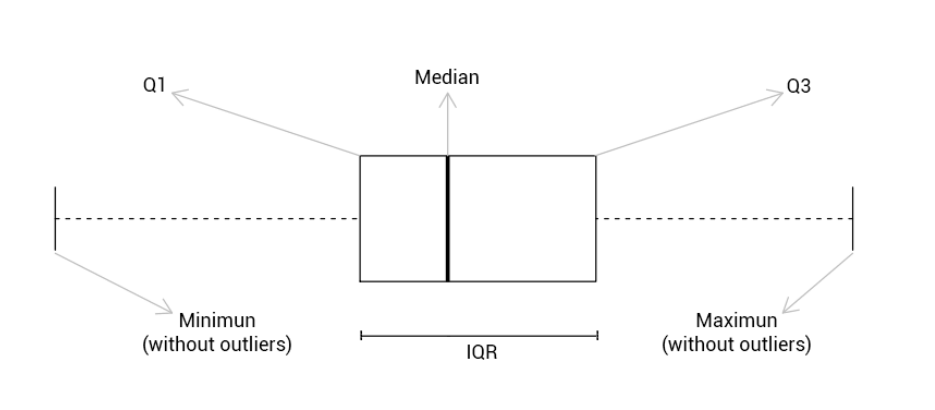

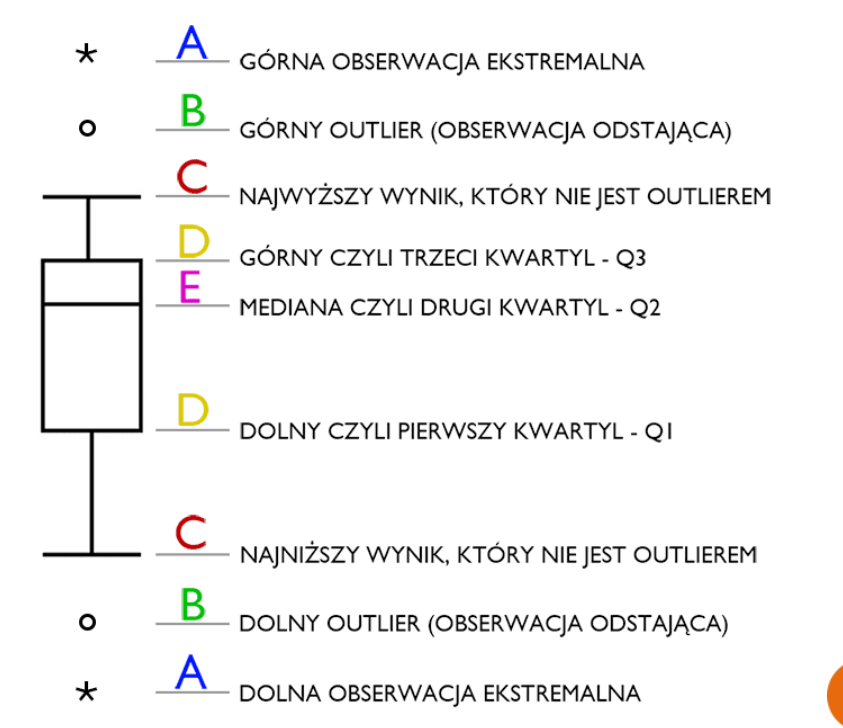

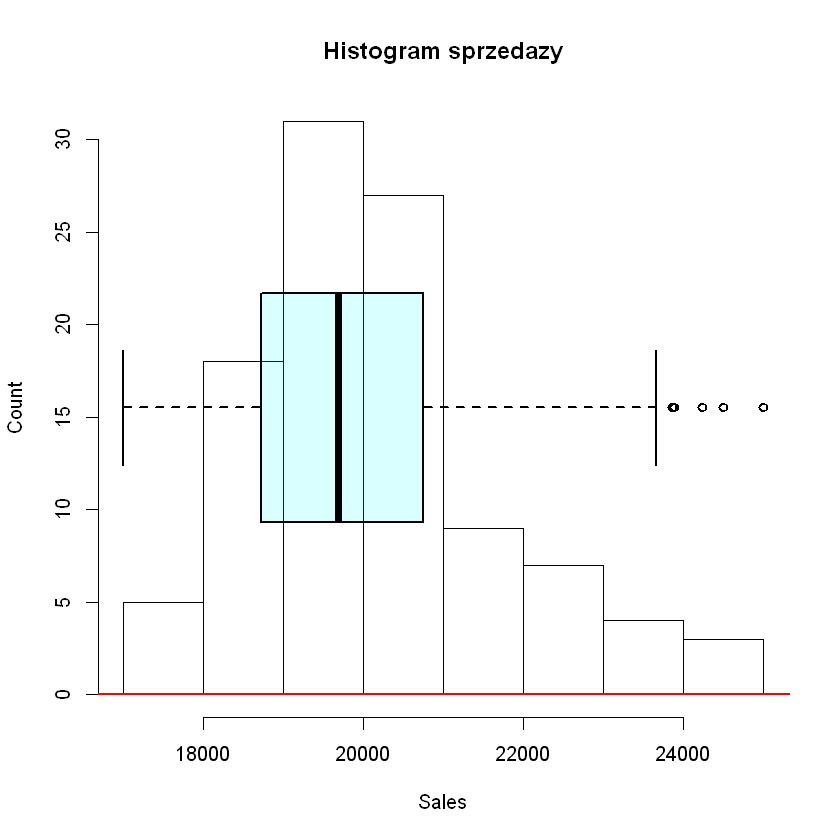

In [152]:
hist(dane.df$NewVolSales,
        main="Histogram sprzedaży",
        xlab="Sales",
        ylab="Count" )
# Axis
axis(1)

# Density
lines(density(dane.df$NewVolSales), col = "red", lwd = 2)

# Add boxplot
par(new = TRUE)
boxplot(dane.df$NewVolSales, horizontal = TRUE, axes = FALSE,
        lwd = 2, col = rgb(0, 1, 1, alpha = 0.15))

Obszar miedzy" wasami" pokrywa wiekszosc rozkladu, outliery sa w prawej czesci histogramu.

<h2>Boxploty dla wszystkich zmiennych<h2>

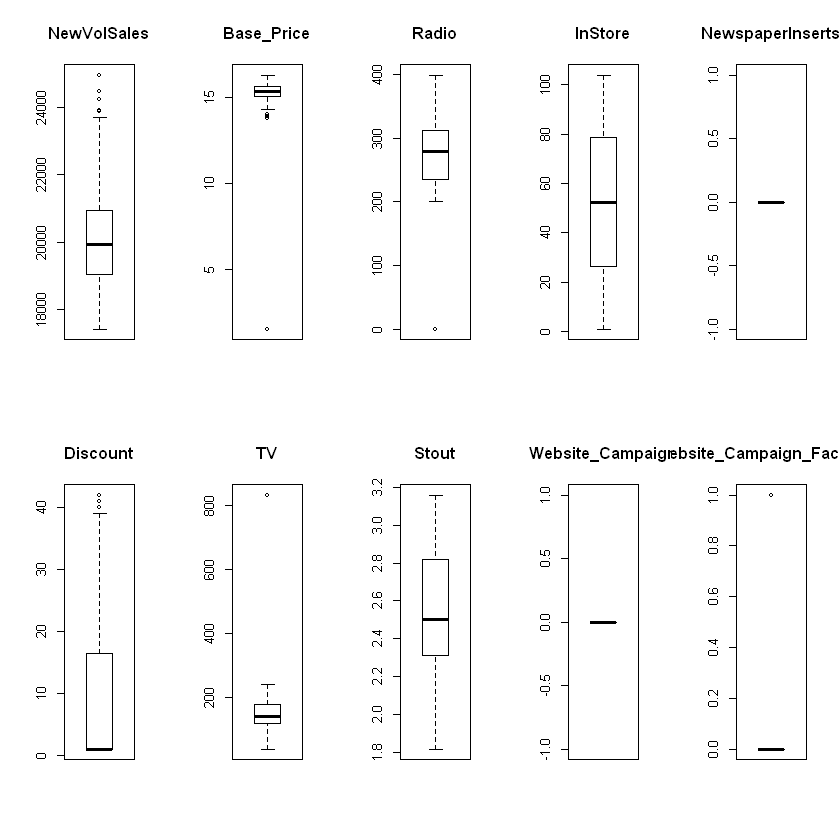

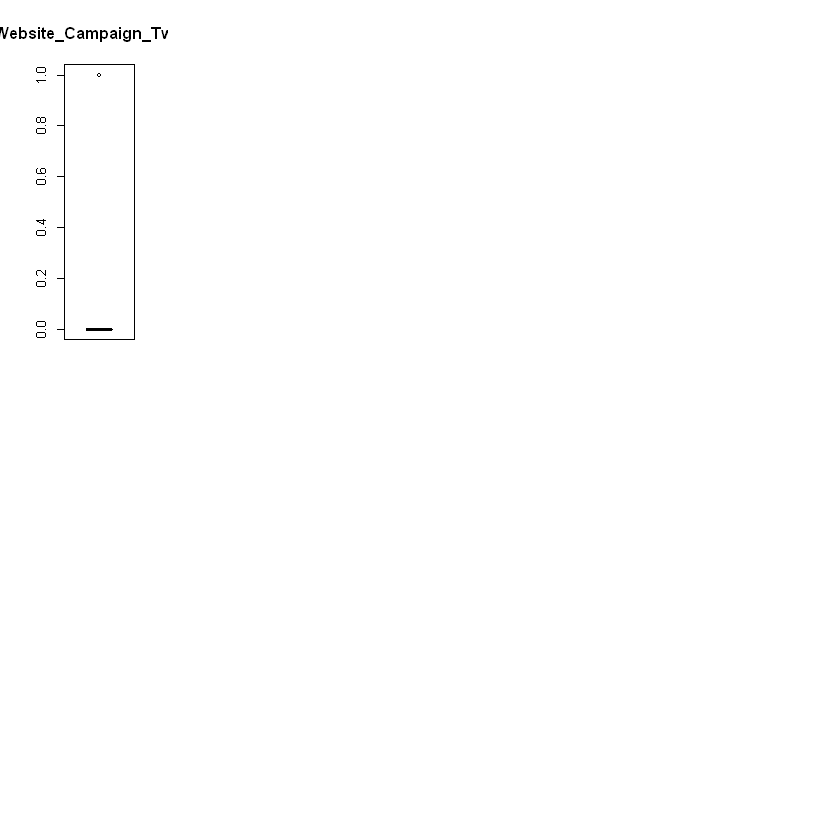

In [153]:
par(mfrow=c(2,5))
for (i in 1:length(dane.df)) {
        boxplot(dane.df[,i], main=names(dane.df[i]), type="l")

}

Podsumowanie:

*TV,Discount,Radio,Sales maja outliery-wartosci oddtaajace.Najwiecej ma ich Discount,najmniej TV

*najbardziej"szeroki" rozklad ma zmienna stout,sales,instore
*Wykresy pudełkowe są stosunkowo krótkie (TV,Radio,Base Price). Sugeruje to, że ogólnie wystapuja podobne liczby ich zakres jest mniejszy.



<h2>Co bocploty moga powiedziec nam o rozkladzie zmiennyc?<h2>

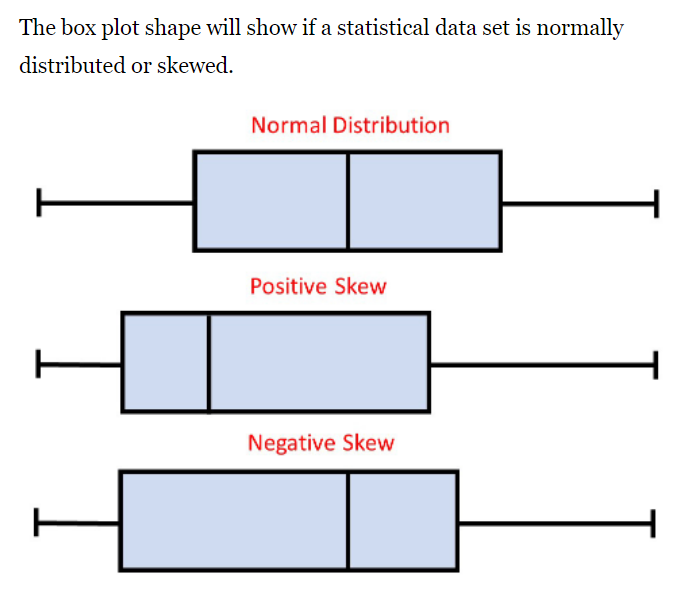

U nas zaden z rozkladow nie jest do konca normalny, co widzimy po boxplotach jesliby je rpyblizyc to zobaczylibysmy ze srodkowa linia nie wystepuje dealnie w srodku prostokata. Mozemy zakonczyc dywagacje nad normalnoscia rozkladu zmiennych, rysujac jescze qq ploty :)

<h2>qq ploty<h2>

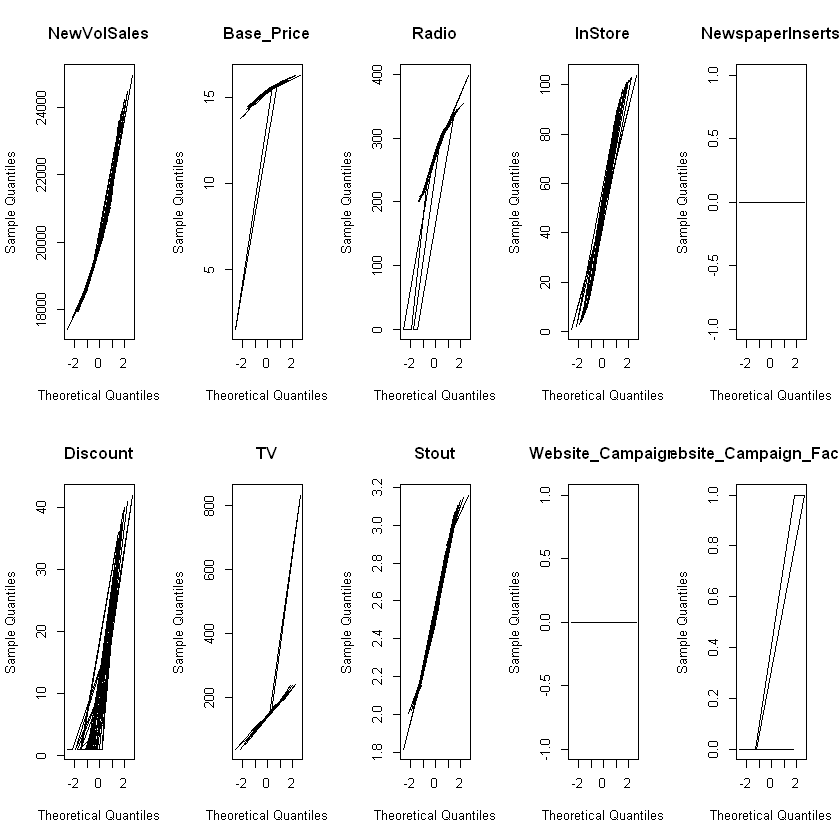

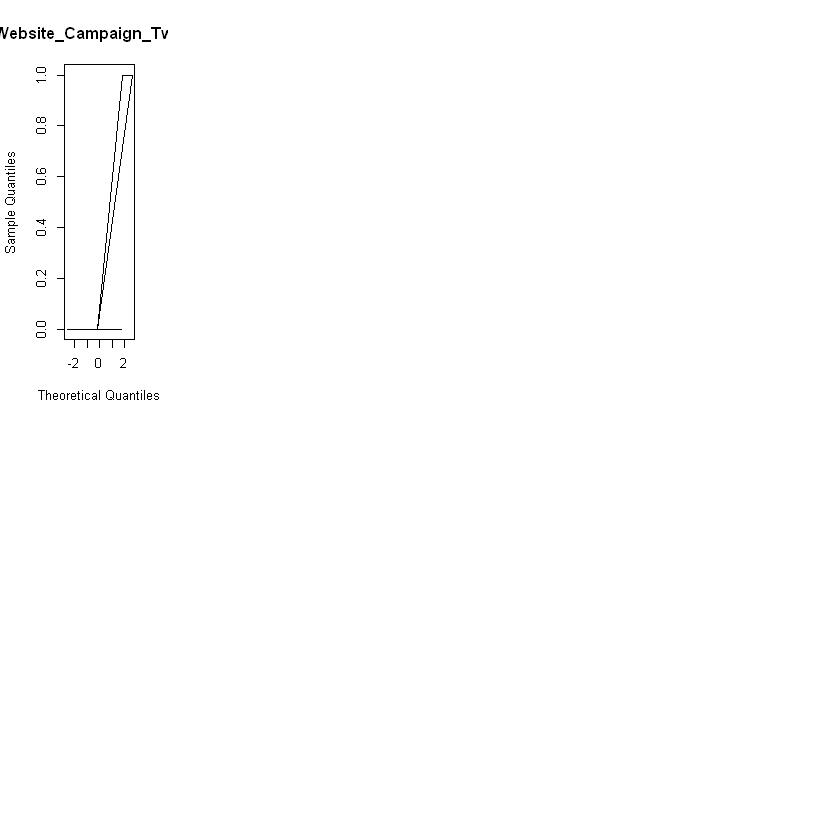

In [18]:
par(mfrow=c(2,5))
for (i in 1:length(dane.df)) {
        qqnorm(dane.df[,i], main=names(dane.df[i]), type="l")

}

Nie widac tu zbyt wiele wiec dla pewnosci mozna sprawdzic jescze rysujac qqplot dla kazdej zmiennej.

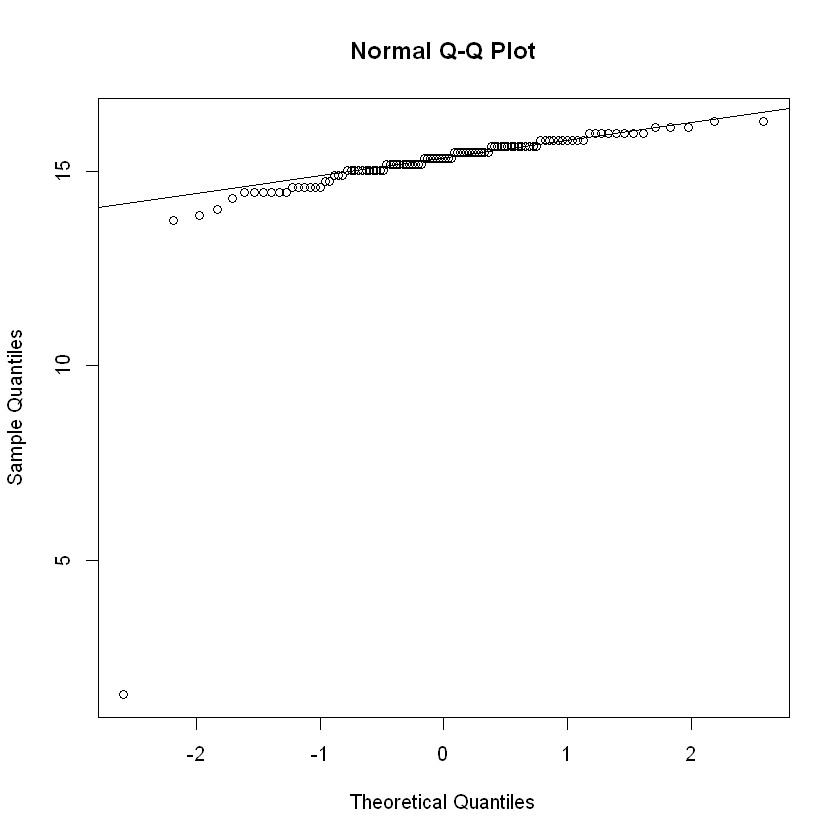

In [19]:
#qq plot
qqnorm(dane.df$Base_Price)
qqline(dane.df$Base_Price)

<h2>Co zrobic dalej?<h2>

Po zidentyfikowaniu wartości odstających i podjęciu decyzji o wprowadzeniu poprawek zgodnie z charakterem problemu można rozważyć jedno z poniższych podejść.

1.Całkowite Usuniecie takich wartosci

2. Imputacja za pomocą średniej / mediany / trybu. Ta metoda została szczegółowo omówiona w dyskusji na temat traktowania brakujących wartości.

3. Ograniczanie
W przypadku brakujących wartości, które leżą poza granicami 1,5 * IQR, możemy je ograniczyć, zastępując obserwacje poza dolną granicą wartością 5. percentyla, a te, które leżą powyżej górnej granicy - wartością 95. percentyla. Poniżej znajduje się przykładowy kod, który pozwala osiągnąć ten cel.

<h2>Czego uzyje?<h2>

*Jesli chcialabym uzyc wartosci sredniej to nalezy podkreslic ze:
Przypuszczalnie średnia ta oznacza tu średnią wszystkich pozostałych wartości, co zostało wyraźnie podkreślone.Uzycie sredniej jest bardzop
subiektywne Użycie średniej może wydawać się bezpieczną i konserwatywną procedurą, ale zmiana wartości na średnią zmieni prawie każdą inną statystykę, w tym miary poziomu, skali i kształtu oraz wskaźniki ich niepewności.

*Wiele statystycznych poradnikow mowi po protu:Należy udać się do laboratorium lub w teren i ponownie wykonać pomiar. Często nie jest to możliwe, ale wydaje się, że jest to standardem w wielu naukach.
No ale my mamy juz gotowe dane..Wnpracy na pewno nalezaloby juz umowic spotkanie z klientem/napisac maila by to sprawdzic.

*Wyrzucenie zmiennych-mozemy stracic obserwacje a przeciez im wiecej obseracji tym lepszy model ebdziemy mieli

*Zdecyduje sie wiec uzyc metody nr 3 poniewaz moim zdaniem(subiektywnym, jest wiele metod radzenia sobie z outlierami),przyniesie najmniejsza
szkode, zatapienie outlierow zmiennymi wchodzacymi w zakres danych znajdujacymi sie najblizej danego outliera sprawi, ze rozklad az tak drastycznie sie nie zmieni.

In [154]:
x <- dane.df$NewVolSales
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
x[x < (qnt[1] - H)] <- caps[1]
x[x > (qnt[2] + H)] <- caps[2]

In [155]:
x <- dane.df$Base_Price
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
x[x < (qnt[1] - H)] <- caps[1]
x[x > (qnt[2] + H)] <- caps[2]

In [156]:
x <- dane.df$Discount
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
x[x < (qnt[1] - H)] <- caps[1]
x[x > (qnt[2] + H)] <- caps[2]

In [159]:
x <- dane.df$TV
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
x[x < (qnt[1] - H)] <- caps[1]
x[x > (qnt[2] + H)] <- caps[2]

<h2>Czy wszystkie zmienne sa nam potrzebne<h2>?

Obserwacje:
Jak już wspomniano, widzimy, że dane mają 4 wartości NaN w przypadku cechy Radio oraz po 98 wartości NaN(czyli pozniej zer ) w przypadku cech NewspaperInserts i Website_Campaign.

Uwaga:
98 wartości NaN na 104 rekordy to bardzo dużo. Decyduje sie wiec na usuniecie tych kolumn i stworzenie nowego data framu, ktorego analize bede kontynuowac.

In [160]:
head(dane.df)

NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign,Website_Campaign_Facebook,Website_Campaign_Twitter
19564,15.029276,245,7,0,1,101.7800,2.28342,0,0,0
19387,15.029276,314,8,0,1,76.7340,2.22134,0,0,0
23889,14.585093,324,101,0,18,131.5902,2.00604,0,0,0
20055,15.332887,298,10,0,1,119.6271,2.19897,0,0,0
20064,15.642632,279,80,0,12,103.4381,1.81860,0,0,0
19481,1.548699,259,23,0,1,128.4014,2.29155,0,0,0


In [161]:
new.df<-dane.df[ , c('Base_Price',"Radio","InStore",'Discount','TV', 'Stout','NewVolSales')]

head(new.df)

Base_Price,Radio,InStore,Discount,TV,Stout,NewVolSales
15.029276,245,7,1,101.7800,2.28342,19564
15.029276,314,8,1,76.7340,2.22134,19387
14.585093,324,101,18,131.5902,2.00604,23889
15.332887,298,10,1,119.6271,2.19897,20055
15.642632,279,80,12,103.4381,1.81860,20064
1.548699,259,23,1,128.4014,2.29155,19481


<h2>Adstock-bardzo wazne pojecie w MMM<h2>

Definicja Adstock
W modelowaniu marketingu mix szacujemy, że skuteczność reklamy zmniejsza się z upływem czasu. Teoria Adstock (Broadbent, 1979) zakłada, że świadomość generowana na temat reklamowanego produktu jest najwyższa, gdy reklama była ostatnio oglądana. Świadomość ostatecznie spada, gdy zmniejsza się ekspozycja na reklamę.U nas zajmiemy sie adstockiem wlasnie dla radia i telwizji.


Jakie wspolczynniki adstocku przyjac?Otoz to zalezy.Tutaj przyjme(po prostu sobie zaloze), ze reklama telwizyjna to reklama w pasmie miedzy wiadomosciami najwyzszej jakosci natomiast reklama w radiu to krotki komunikat w porze o sredniej ogladalnosci, wiec zeby to rozroznic nadam tv wiekszy adstock niz radiu, np. 0,3 do 0,1.

In [162]:
#TV 
set_rate_TV <- 0.1
set_memory <- 2
get_adstock_TV <- rep(set_rate_TV, set_memory+1) ^ c(0:set_memory)


#Radio
set_rate_R <- 0.3
set_memory <- 2
get_adstock_R <- rep(set_rate_R, set_memory+1) ^ c(0:set_memory)


In [163]:
ads_TV <- stats::filter(c(rep(0, set_memory), new.df$TV), get_adstock_TV, method="convolution")
ads_TV <- ads_TV[!is.na(ads_TV)]
head(ads_TV)

[1] 101.7800  86.9120 140.2814 133.5534 116.7167 139.9415

In [164]:
ads_R <- stats::filter(c(rep(0, set_memory), new.df$Radio), get_adstock_R, method="convolution")
ads_R <- ads_R[!is.na(ads_R)]
head(ads_R)

[1] 245.00 387.50 440.25 423.46 397.56 369.52

In [165]:
ads_TV <-ads_TV[1:104]
ads_TV

[1] 101.78000  86.91200 140.28140 133.55342 116.71673 139.94152 108.53496
  [8] 130.00819 135.79986 200.93356 186.31857 199.59227 195.89678 167.25083
 [15] 165.26225 146.57558 142.19737 129.44731 135.20739 164.84092 201.17308
 [22] 158.31622 155.38657 207.97577 212.98583 160.33685 253.94445 170.83314
 [29] 849.33719 238.11741 226.63265 238.40083 205.20765 255.30409 261.07973
 [36] 194.86622 152.39357 113.18617 173.53445 168.13574 135.35002 176.50301
 [43] 151.48850 141.60695 146.19059 176.22298 219.38709 201.58393 212.66988
 [50] 261.35706 177.70352 175.31196 196.42119 150.08946 143.77094 192.10388
 [57] 157.92156  89.51577 140.61943 205.58683 145.81395  94.74828 111.49279
 [64] 187.98684 196.12725 125.93318 142.76315 189.63295 127.79708 150.40143
 [71] 182.40023 139.30177 108.87363 155.79419 150.61056 132.65167 161.82580
 [78] 146.12914  63.10974 105.16662 152.99789 123.62457 155.72547 124.89854
 [85]  95.20206  47.03292 102.62068 130.44730  50.69749 110.84885 108.17775
 [92] 188.97403 177.24971  68.80521 194.88556 225.51507  84.98582 164.11605
 [99] 198.67711  91.41673 144.07932 191.18350 183.57415 180.35054

In [166]:
ads_TV <-ads_TV[1:104]
new.df$ads_R<-ads_R
new.df$ads_TV<-ads_TV
head(new.df)

Base_Price,Radio,InStore,Discount,TV,Stout,NewVolSales,ads_R,ads_TV
15.029276,245,7,1,101.7800,2.28342,19564,245.00,101.7800
15.029276,314,8,1,76.7340,2.22134,19387,387.50,86.9120
14.585093,324,101,18,131.5902,2.00604,23889,440.25,140.2814
15.332887,298,10,1,119.6271,2.19897,20055,423.46,133.5534
15.642632,279,80,12,103.4381,1.81860,20064,397.56,116.7167
1.548699,259,23,1,128.4014,2.29155,19481,369.52,139.9415


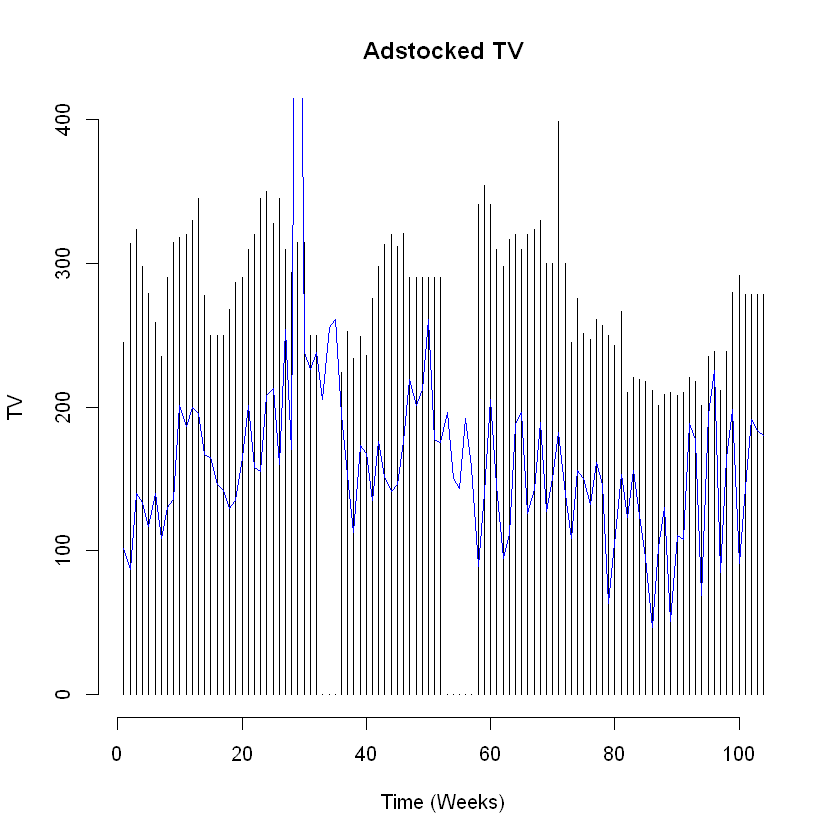

In [167]:
#plot
plot(seq(1,length(new.df$TV)), new.df$Radio, type="h", 
main = "Adstocked TV",
xlab="Time (Weeks)", ylab="TV", 
#ylim=c(0, max(c(dane.df$Radio, ads_R))), 
frame.plot=FALSE)
lines(ads_TV, col="blue")




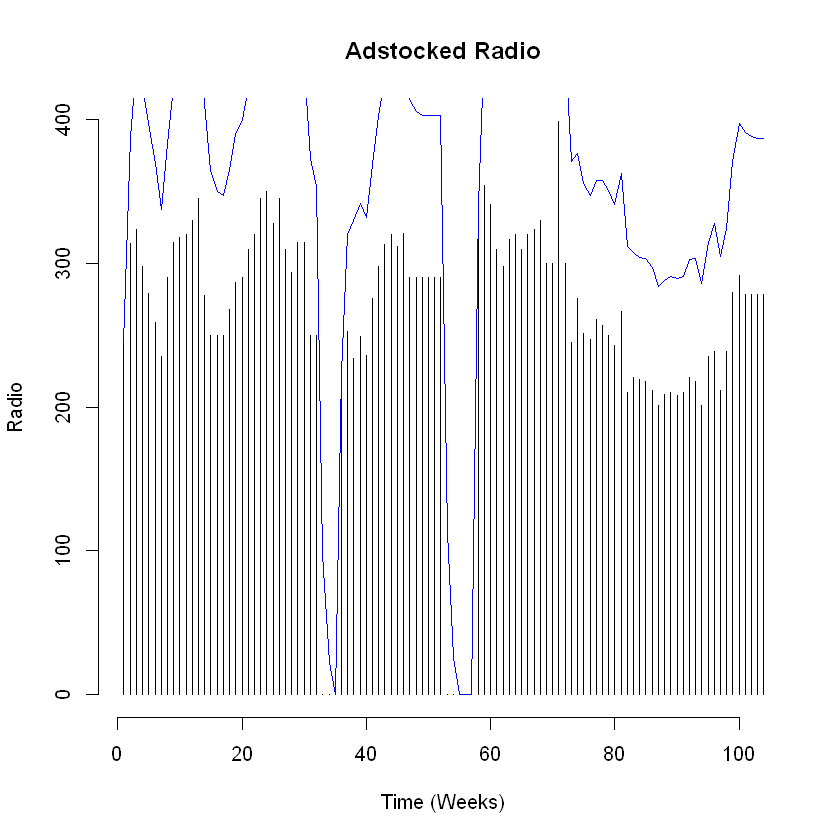

In [168]:
#plot
plot(seq(1,length(new.df$Radio)), new.df$Radio, type="h", 
main = "Adstocked Radio",
xlab="Time (Weeks)", ylab="Radio", 
#ylim=c(0, max(c(dane.df$Radio, ads_R))), 
frame.plot=FALSE)
lines(ads_R, col="blue")

<h2>Transformacja Box-Cox<h2>

Chcemy przekształcic nasza zmienna objasniana oraz objasniajace do rozkladu normalnego.Celem talkiego zabiegu jest fakt, ze zmienne w rozkladzie normalnym powoduja ze model bedzie lepiej dopasowywał sie do danych. Rozklad normalny to jest rowniez rozklad, do ktorego w naturze zmierza wiele zmiennych, zgodnie z twierdzeniem Gaussa jesli mamy wiele obserwacji w danych, dane powinny zbiegac wlanie do normalnego rozkladu.Dla porownania pierwszy model wykonam jescze dla starych nieznormalizowanych danych i bedzie widac, iz jego jakosc jest gorsza.

In [35]:
install.packages("forecast") 
library(forecast)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'forecast' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [169]:

autoTransform <- function(x) {
   library(forecast)
   return(scale(BoxCox(x, BoxCox.lambda(x))))
   }

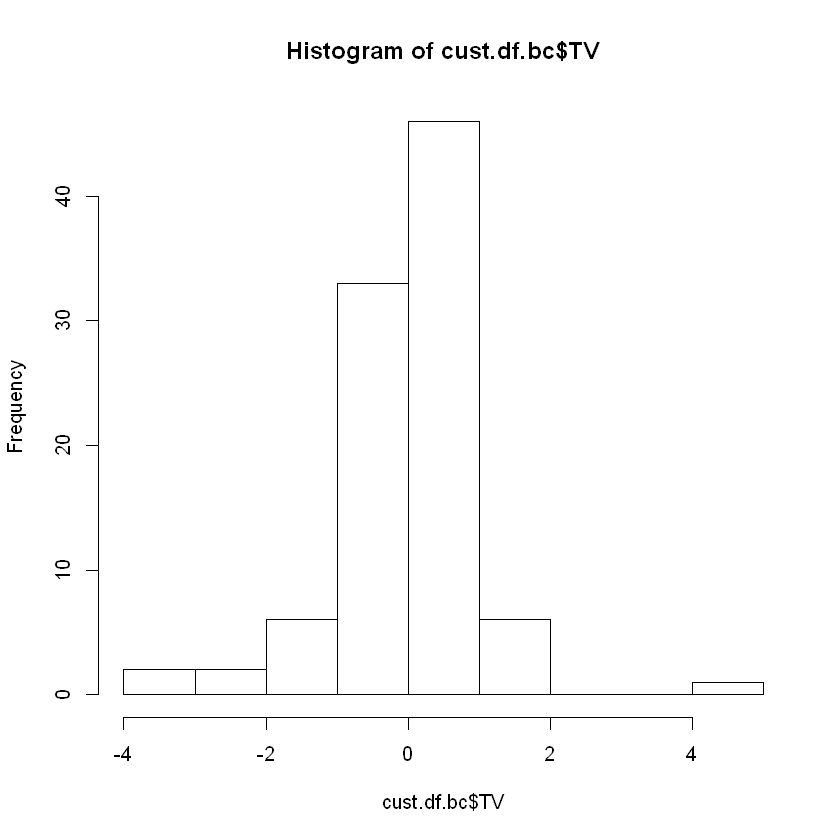

In [170]:

cust.df.bc <- new.df
cust.df.bc <- subset(cust.df.bc, Radio > 0)
numcols <- which(colnames(cust.df.bc) != "email")
cust.df.bc[ , numcols] <- lapply(cust.df.bc[ , numcols], autoTransform )  
hist(cust.df.bc$TV)

In [171]:
head(cust.df.bc)

Base_Price,Radio,InStore,Discount,TV,Stout,NewVolSales,ads_R,ads_TV
-0.2169592,-0.6902565,-1.7307430,-0.8105201,-0.66072018,-0.8271712,-0.31632786,-2.0123607,-1.0529111
-0.2169592,0.8265959,-1.6577658,-0.8105201,-1.39668024,-1.0256238,-0.44258002,-0.0139619,-1.5094701
-0.6728336,0.9928300,1.3448379,1.1278852,-0.01494430,-1.7196219,2.18728750,0.9541372,-0.1569426
0.1025119,0.5374165,-1.5237957,-0.8105201,-0.25199356,-1.0973102,0.02223204,0.6326117,-0.2915043
0.4350204,0.1509387,0.8748472,0.8568641,-0.61944384,-2.3317182,0.02828318,0.1611440,-0.6653944
-7.9622302,-0.3171360,-0.8591130,-0.8105201,-0.07566809,-0.8012340,-0.37524519,-0.3157473,-0.1635615


Widzimy teraz ze rozklad ulegl normalizacji.Sprawdzmy to.

In [172]:
skewness(cust.df.bc$Radio)

kurtosis(cust.df.bc$Radio)

[1] -0.5202717

[1] 2.290686

Teraz nasze dane duszo bardziej zblizyly sie do rozkladu normalnego.

<h2>Sprawdzanie korelacji<h2>

Analiza korelacji ułatwia zrozumienie zachowań np.marketingowych i pomaga zlokalizować najważniejsze zmienne, od których zależą inne. 3. Gdy dwie zmienne są skorelowane, można oszacować wartość jednej zmiennej na podstawie wartości drugiej. Dokonuje się tego za pomocą równań regresji.

Wykorzystując funkcję chart.Correlation() z pakietu PerformanceAnalytics, zwizualizujmy korelację między zmiennymi na ładnym wykresie:

In [40]:
install.packages("corrplot")
install.packages("gplots")
library(corrplot) # for correlation plot, install if needed

library(gplots) # color interpolation, install if needed

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'corrplot' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'gplots' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"corrplot 0.92 loaded
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is mask

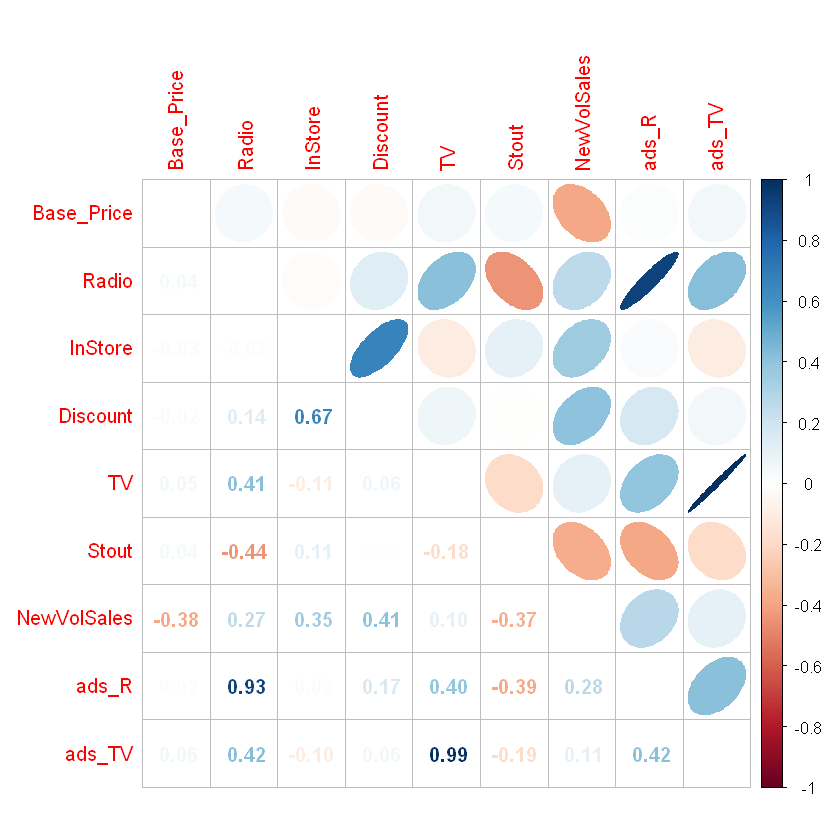

In [173]:
corrplot.mixed(corr=cor(cust.df.bc, use="complete.obs"),
                  upper="ellipse", tl.pos="lt"
                  )

Discount ma najwiekszy pozytywny związek ze sprzedażą - a związek jest silny (0,41). InStore również ma pozytywny i wysoki  związek ze sprzedażą  (0,35). Natomiast np. Stout  ma negatywny związek ze sprzedażą(-0,37),takze Base_Price ma negatywny zwiazek(co jest jasne).

<h1>Tworzenie modelu<h1>

In [174]:
mmm <- lm(NewVolSales ~ Base_Price + Radio + InStore  + Discount + TV +Stout , data=new.df )
summary(mmm)


Call:
lm(formula = NewVolSales ~ Base_Price + Radio + InStore + Discount + 
    TV + Stout, data = new.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3546.4  -773.1  -114.6   719.7  3678.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27411.489   1742.913  15.727  < 2e-16 ***
Base_Price   -226.193     86.442  -2.617  0.01030 *  
Radio          -0.799      1.494  -0.535  0.59405    
InStore        17.773      5.903   3.011  0.00332 ** 
Discount       19.377     13.941   1.390  0.16775    
TV              1.391      1.599   0.870  0.38650    
Stout       -1934.752    412.282  -4.693 8.85e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1267 on 97 degrees of freedom
Multiple R-squared:  0.3936,	Adjusted R-squared:  0.3561 
F-statistic: 10.49 on 6 and 97 DF,  p-value: 5.989e-09


In [48]:
mmm_1 <- lm(NewVolSales ~ Base_Price + Radio + InStore  + Discount + TV +Stout , data=cust.df.bc )
summary(mmm_1)


Call:
lm(formula = NewVolSales ~ Base_Price + Radio + InStore + Discount + 
    TV + Stout, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.09216 -0.44310 -0.01653  0.52218  1.66108 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.125e-11  7.732e-02   0.000 1.000000    
Base_Price  -3.605e-01  7.808e-02  -4.617 1.31e-05 ***
Radio        9.801e-02  9.444e-02   1.038 0.302155    
InStore      2.344e-01  1.075e-01   2.180 0.031903 *  
Discount     2.250e-01  1.074e-01   2.095 0.039008 *  
TV           2.788e-02  8.636e-02   0.323 0.747601    
Stout       -3.289e-01  8.744e-02  -3.762 0.000301 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7576 on 89 degrees of freedom
Multiple R-squared:  0.4623,	Adjusted R-squared:  0.4261 
F-statistic: 12.75 on 6 and 89 DF,  p-value: 2.429e-10


Widzimy-tak jak obiecalam pokazalam model przed i po transformacji box-cox.Ewidentnie model nr 2 przedstawia lepsze rezultaty.

<h2>Jak badac wspołliniowość zmiennych?VIF-czynnik inflacji wariancji<h2>

Sytuacja występowania współliniowości dotyczy sytuacji, gdy pod względem wartości predyktory są bardzo podobne do siebie, np. cena mąki i cena chleba. Jeden i drugi predyktor jest bardzo podobny do siebie. W takich przypadkach do modelu powinniśmy wybrać tylko jeden z podobnych znaczeniowo predyktorów.

Interpretacja:powyzej 5 musimy sie zastanowic,powyzej 10-niedopuszczalna wspolliniowosc.

In [43]:
library(car)
vif(mmm_1)



Loading required package: carData


Base_Price      Radio    InStore   Discount         TV      Stout 
  1.006781   1.045133   2.035487   2.006594   1.050630   1.049018

<h2>Model z adstockiem<h2>

In [175]:
mmm_2 <- lm(NewVolSales ~ Base_Price + Radio + InStore  + Discount + TV +Stout+ads_R+ads_TV , data=cust.df.bc )
summary(mmm_2)


Call:
lm(formula = NewVolSales ~ Base_Price + Radio + InStore + Discount + 
    TV + Stout + ads_R + ads_TV, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.08070 -0.44746 -0.02874  0.46888  1.65399 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.125e-11  7.773e-02   0.000  1.00000    
Base_Price  -3.649e-01  7.893e-02  -4.624  1.3e-05 ***
Radio        4.580e-02  2.186e-01   0.210  0.83453    
InStore      2.256e-01  1.084e-01   2.081  0.04036 *  
Discount     2.339e-01  1.089e-01   2.148  0.03447 *  
TV          -5.197e-01  5.715e-01  -0.909  0.36572    
Stout       -3.287e-01  8.811e-02  -3.731  0.00034 ***
ads_R        4.495e-02  2.143e-01   0.210  0.83437    
ads_TV       5.553e-01  5.748e-01   0.966  0.33669    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7616 on 87 degrees of freedom
Multiple R-squared:  0.4689,	Adjusted R-squared:   0.42 
F-statistic:   9.6 o

Nastapila jedynie nieznaczna poprawa.Ale czy na pewno?Czy czasem adstock nie jest skorelowany zbyt mocno z oryginalna zmienna?

In [176]:
library(car)
vif(mmm_2)

Base_Price      Radio    InStore   Discount         TV      Stout      ads_R 
  1.020358   7.828166   1.924814   1.942479  53.502763   1.271597   7.525574 
    ads_TV 
 54.123947

Jest duza wspolliniowosc.Nalezaloby zrobic dwa modele:jeden badajacy czyste zmienne drugi ich adstocki. Tak wlasnie uczynie.

In [177]:
mmm_1 <- lm(NewVolSales ~ Base_Price + Radio + InStore  + Discount + TV +Stout , data=cust.df.bc )
summary(mmm_1)


Call:
lm(formula = NewVolSales ~ Base_Price + Radio + InStore + Discount + 
    TV + Stout, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.09216 -0.44310 -0.01653  0.52218  1.66108 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.125e-11  7.732e-02   0.000 1.000000    
Base_Price  -3.605e-01  7.808e-02  -4.617 1.31e-05 ***
Radio        9.801e-02  9.444e-02   1.038 0.302155    
InStore      2.344e-01  1.075e-01   2.180 0.031903 *  
Discount     2.250e-01  1.074e-01   2.095 0.039008 *  
TV           2.788e-02  8.636e-02   0.323 0.747601    
Stout       -3.289e-01  8.744e-02  -3.762 0.000301 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7576 on 89 degrees of freedom
Multiple R-squared:  0.4623,	Adjusted R-squared:  0.4261 
F-statistic: 12.75 on 6 and 89 DF,  p-value: 2.429e-10


No dobrze, to znany juz przez nas model. Nie mozemy jednoczescie uzyc adstockow oraz zmiennych, to moze jest cos co powinnismy wykonac by poprawic jakosc naszego modelu???


<h2>Postać funkcyjna modelu-poprawienie specyfiukacji modelu???<h2>

Nie zawsze pierwotny model przyniesie takie rezultaty, jak bysmy tego oczekiwali. Poprawa specyfikacji modelu nazywamy przeksztlcenie modelu tak, aby dawał on lepsze rezultaty.Istnieje wile sposobow na to , na przykłąd:

*mozemy powiekszyc nasz zbior danych o wiecej danych z tych samych zmiennych-u nas nie ma tej mozliwosci poniewaz mam gotowy zbior danych,

*mozemy dodac nowe zmienne-takze brak takiej mozliwosci

*mozemy zastosowac transformacje np logarytmiczna zmiennych-zajme sie tu wlanie tym krokiem.

In [52]:
install.packages("lmtest")
library(lmtest)


  There is a binary version available but the source version is later:
       binary source needs_compilation
lmtest 0.9-38 0.9-40              TRUE

  Binaries will be installed
package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\weron\Anaconda3\envs\r-tutorial\Lib\R\library\00LOCK\lmtest\libs\x64\lmtest.dll to C:\Users\weron\Anaconda3\envs\r-tutorial\Lib\R\library\lmtest\libs\x64\lmtest.dll: Permission denied"Warning message:
"restored 'lmtest'"


The downloaded binary packages are in
	C:\Users\weron\AppData\Local\Temp\RtmpIjTtVj\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



<h2>A jak sprawdzic czy nasz model w ogóle potrzebuje takiej transformacji? <h2>

Do przetestowania poprawności funkcyjnej modelu użyję testu RESET, sprawdzającego czy dodanie do modelu nowych zmiennych (np. ich wyższych potęg zmiennych) jest istotne statystycznie i poprawi dopasowanie modelu. 


𝐻0:𝑀𝑜𝑑𝑒𝑙⁡ 𝑚𝑎 ⁡𝑝𝑜𝑝𝑟𝑎𝑤𝑛ą⁡ 𝑠𝑝𝑒𝑐𝑦𝑓𝑖𝑘𝑎𝑐𝑗ę. 
𝐻1:𝑀𝑜𝑑𝑒𝑙 ⁡𝑛𝑖𝑒⁡ 𝑚𝑎⁡ 𝑝𝑜𝑝𝑟𝑎𝑤𝑛𝑒𝑗 ⁡𝑠𝑝𝑒𝑐𝑦𝑓𝑖𝑘𝑎𝑐𝑗𝑖. 


Wykorzystuję RESET test dostępny w pakiecie lmtest. 


In [179]:

reset(mmm_1,type="fitted")


	RESET test

data:  mmm_1
RESET = 52.571, df1 = 2, df2 = 87, p-value = 1.075e-15


Statystyka F testu wynosi 1.075e-15 ,zatem:
Na poziomie istotności 𝛼=0,05  odrzucamy hipoteze zerowa, mówiąca o tym, że model ma poprawną specyfikację. Mozemy wiec cos zaczac kombinowac by poprawic specyfikacje modelu.



<h2>Jak poprawic specyfikacje modelu?<h2>

Specyfikacja modelu to proces określania, które zmienne niezależne należy włączyć do równania regresji, a które z niego wykluczyć. Jak wybrać najlepszy model regresji? 

<h3>Dodaje logarytmy -probuje w roznych zmiennych aby jescze bardziej znormalizowac ich rozklad <h3>

In [182]:
mmm_2 <- lm(log(NewVolSales) ~ Base_Price + Radio + log(InStore)  + Discount + TV +Stout , data=cust.df.bc )
summary(mmm_2)

Warning message in log(NewVolSales):
"NaNs produced"Warning message in log(InStore):
"NaNs produced"


Call:
lm(formula = log(NewVolSales) ~ Base_Price + Radio + log(InStore) + 
    Discount + TV + Stout, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96692 -0.39009  0.01473  0.36309  1.40787 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.4713     0.2904  -5.067 4.48e-05 ***
Base_Price    -1.8778     0.2670  -7.033 4.67e-07 ***
Radio         -0.1359     0.2367  -0.574   0.5716    
log(InStore)   0.1600     0.1955   0.818   0.4219    
Discount       0.2939     0.1968   1.493   0.1496    
TV             0.4214     0.1794   2.349   0.0282 *  
Stout         -0.3177     0.1523  -2.086   0.0488 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7709 on 22 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.7385,	Adjusted R-squared:  0.6672 
F-statistic: 10.35 on 6 and 22 DF,  p-value: 1.765e-05


<h2>Model z adstockiem<h2>

In [185]:
mmm_3 <- lm(log(NewVolSales) ~ Base_Price + Radio + log(InStore)  + Discount + ads_TV +Stout , data=cust.df.bc )
summary(mmm_3)

Warning message in log(NewVolSales):
"NaNs produced"Warning message in log(InStore):
"NaNs produced"


Call:
lm(formula = log(NewVolSales) ~ Base_Price + Radio + log(InStore) + 
    Discount + ads_TV + Stout, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.95360 -0.38746  0.03943  0.36291  1.36839 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.4788     0.2905  -5.091 4.23e-05 ***
Base_Price    -1.8864     0.2675  -7.052 4.48e-07 ***
Radio         -0.1221     0.2318  -0.527   0.6036    
log(InStore)   0.1426     0.1951   0.731   0.4727    
Discount       0.2861     0.1958   1.462   0.1580    
ads_TV         0.4247     0.1791   2.371   0.0269 *  
Stout         -0.3270     0.1525  -2.144   0.0433 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7694 on 22 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.7395,	Adjusted R-squared:  0.6685 
F-statistic: 10.41 on 6 and 22 DF,  p-value: 1.696e-05


Mamy jescze wieksza poprawe :)

Widzimy bardzo fajny wynik modelu. A co teraz powie nam test reset?

In [183]:

reset(mmm_2,type="fitted")


	RESET test

data:  mmm_2
RESET = 2.322, df1 = 2, df2 = 20, p-value = 0.1239


Teraz mowi nam, ze taki model wystarczy i nie trzeba juz dluzej poprawiac specyfikacji poniewaz jest poprawna :)

Natomiast Radio jest  niesitotne statystycznie.

<h2>Współliniowość-czy jescze mamy z nią problem?<h2>

In [184]:
library(car)
vif(mmm_2)

Base_Price        Radio log(InStore)     Discount           TV        Stout 
    1.255049     2.011196     1.502080     1.653358     1.786490     1.157602

In [186]:
vif(mmm_3)

Base_Price        Radio log(InStore)     Discount       ads_TV        Stout 
    1.264582     1.935769     1.501883     1.642079     1.730059     1.165194

Wniosek:nie mamy problemu ze współliniowością.

<h2>Istotność parametrów <h2>


Testowanie istotności parametrów =>test t-studenta: 

𝐻0:𝑍𝑚𝑖𝑒𝑛𝑛𝑎 ⁡𝑗𝑒𝑠𝑡⁡ 𝑛𝑖𝑒𝑖𝑠𝑡𝑜𝑡𝑛𝑎 ⁡𝑠𝑡𝑎𝑡𝑦𝑠𝑡𝑦𝑐𝑧𝑛𝑖𝑒. 
𝐻1:𝑍𝑚𝑖𝑒𝑛𝑛𝑎 ⁡𝑗𝑒𝑠𝑡⁡ 𝑖𝑠𝑡𝑜𝑡𝑛𝑎⁡ 𝑠𝑡𝑎𝑡𝑦𝑠𝑡𝑦𝑐𝑧𝑛𝑖𝑒.

 Na poziomie istotności 𝛼=0,05, dla zmiennych Base Price,TV,STout wartości krytyczne są mniejsze od 𝛼. Odrzucam więc hipotezę zerową mówiącą o nieistotności parametrów, na rzecz hipotezy alternatywnej mówiącej o tym, że parametry przy zmiennych są istotne statystycznie. Natomiast  zmienna 0.1496, która stanie się istotna dopiero na poziomie istotności 𝛼=0.14. Jednak ze względu na dość dużą próbę,mozna ja zinterpretowac. Natomiast zmienna Radio jest nieisstotna i moznaby to poddac zastanowieniu.

Dodatkowo, na podstawie wydruku z programu R, mogę sprawdzić jednoczesną istotność podzbioru zmiennych objaśniających za pomocą uogólnionego testu Walda. 

𝐻0:𝑊𝑠𝑧𝑦𝑠𝑡𝑘𝑖𝑒 ⁡𝑧𝑚𝑖𝑒𝑛𝑛𝑒⁡ są łą𝑐𝑧𝑛𝑖𝑒 ⁡𝑛𝑖𝑒𝑖𝑠𝑡𝑜𝑡𝑛𝑒⁡ 𝑠𝑡𝑎𝑡𝑦𝑠𝑡𝑦𝑐𝑧𝑛𝑖𝑒. 

𝐻1:𝐼𝑠𝑡𝑛𝑖𝑒𝑗𝑒⁡ 𝑐𝑜⁡𝑛𝑎𝑗𝑚𝑛𝑖𝑒𝑗 ⁡𝑗𝑒𝑑𝑛𝑎⁡ 𝑧𝑚𝑖𝑒𝑛𝑛𝑎,𝑘𝑡ó𝑟𝑎⁡ 𝑗𝑒𝑠𝑡⁡ 𝑖𝑠𝑡𝑜𝑡𝑛𝑎 ⁡𝑠𝑡𝑎𝑡𝑦𝑠𝑡𝑦𝑐𝑧𝑛𝑖𝑒. 

Statystyka F wynosi 10.35, wartość krytyczna jest mniejsza niż 0.05(wynosi 10.35) .Na poziomie istotności 0.05 odrzucam więc hipotezę zerową, mówiącą o łącznej nieistotności na rzecz hipotezy alternatywnej mówiącej o tym, że co najmniej jedna ze zmiennych jest istotna statystycznie (co potwierdza poprzednie wnioski z testowania poszczególnych zmiennych).


<h2>Własności składnika losowego<h2>


Normalność rozkładu składnika losowego ułatwia konstrukcję testów statystycznych przydatnych do weryfikacji modelu ekonometrycznego. Przetestuję ją za pomocą testu Jarque-Bera. Opiera się on na weryfikacji podobieństwa trzeciego i czwartego momentu rozkładu składnika losowego modelu do znanych wartości tych momentów w rozkładzie normalnym. 

𝐻0:𝑆𝑘ł𝑎𝑑𝑛𝑖𝑘 ⁡𝑙𝑜𝑠𝑜𝑤𝑦⁡ 𝑚𝑎⁡ 𝑟𝑜𝑧𝑘ł𝑎𝑑⁡ 𝑛𝑜𝑟𝑚𝑎𝑙𝑛𝑦.
 
 𝐻1:𝑆𝑘ł𝑎𝑑𝑛𝑖𝑘 ⁡𝑙𝑜𝑠𝑜𝑤𝑦 ⁡𝑛𝑖𝑒⁡ 𝑚𝑎⁡ 𝑟𝑜𝑧𝑘ł𝑎𝑑𝑢⁡ 𝑛𝑜𝑟𝑚𝑎𝑙𝑛𝑒𝑔𝑜. 

W programie R wykorzystuję jarque.bera.test dostępny w pakiecie tseries. 


Na poziomie istotności ∝ = 0,05 nie ma podstaw do odrzucenia  hipotezy zerowej, mówiącej o normalności składnika losowego


In [109]:
install.packages("normtest")
library("normtest")

package 'normtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\weron\AppData\Local\Temp\RtmpIjTtVj\downloaded_packages


3           5           9          16          19          21 
 0.20660809 -1.96691512 -0.24330609 -0.20508807  0.80996377  0.36308990 
         25          27          32          36          39          47 
-0.63320471 -0.07717176  0.92634695 -0.79779615 -0.60382222  0.14065017 
         48          49          50          52          65          68 
 0.32573160 -0.04935028  0.56259577  0.62050399 -0.43267757  0.34624822 
         70          71          73          75          76          77 
 0.01473390 -0.38120558 -0.12319746 -0.71881888  0.11071293 -0.39008724 
         79          80          85          89         103 
 1.40787436  0.06873438  1.08343615 -0.81526536  0.45067634 
attr(,"scaled:center")
[1] 1.000026
attr(,"scaled:scale")
[1] 3.699058e-06

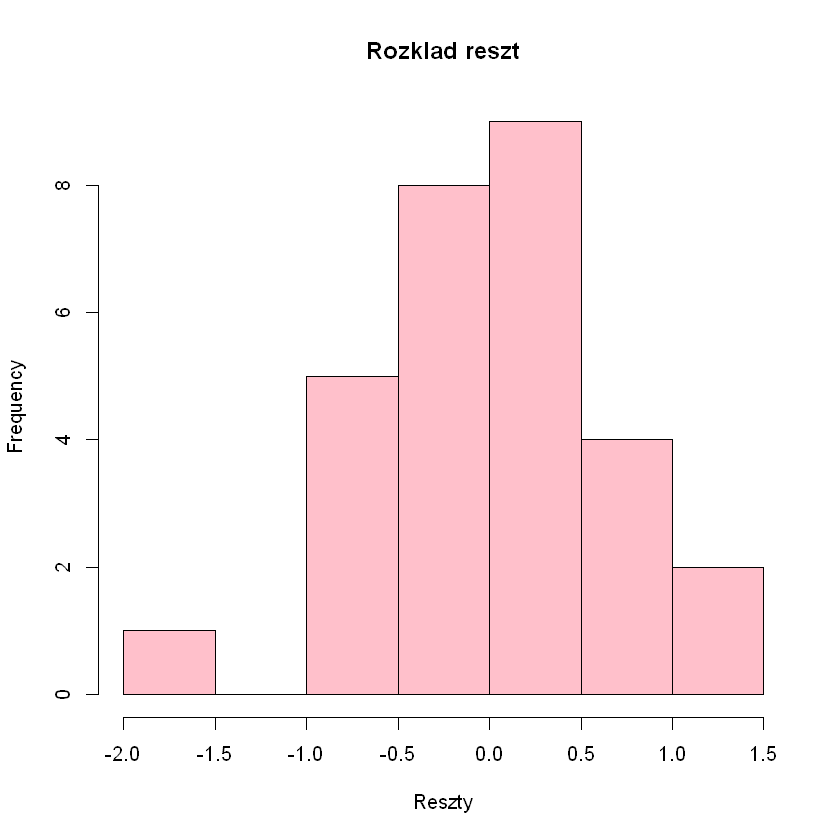

In [187]:

ehat <- mmm_4$residuals
ehat
#jarque.bera.test(ehat)
hist(ehat, main = "Rozklad reszt", col = "pink", xlab="Reszty")

3           5           9          16          19          21 
 0.25286389 -1.95359973 -0.22878917 -0.23283741  0.79710226  0.35254427 
         25          27          32          36          39          47 
-0.66845232 -0.08620128  0.92747739 -0.84523498 -0.55073781  0.11771607 
         48          49          50          52          65          68 
 0.26444429 -0.06629825  0.54320292  0.62655840 -0.41474290  0.36290555 
         70          71          73          75          76          77 
 0.03943004 -0.38746136 -0.09817370 -0.70540742  0.12679396 -0.37901575 
         79          80          85          89         103 
 1.36838912  0.10849546  1.11454495 -0.84305101  0.45753453 
attr(,"scaled:center")
[1] 1.000026
attr(,"scaled:scale")
[1] 3.699058e-06

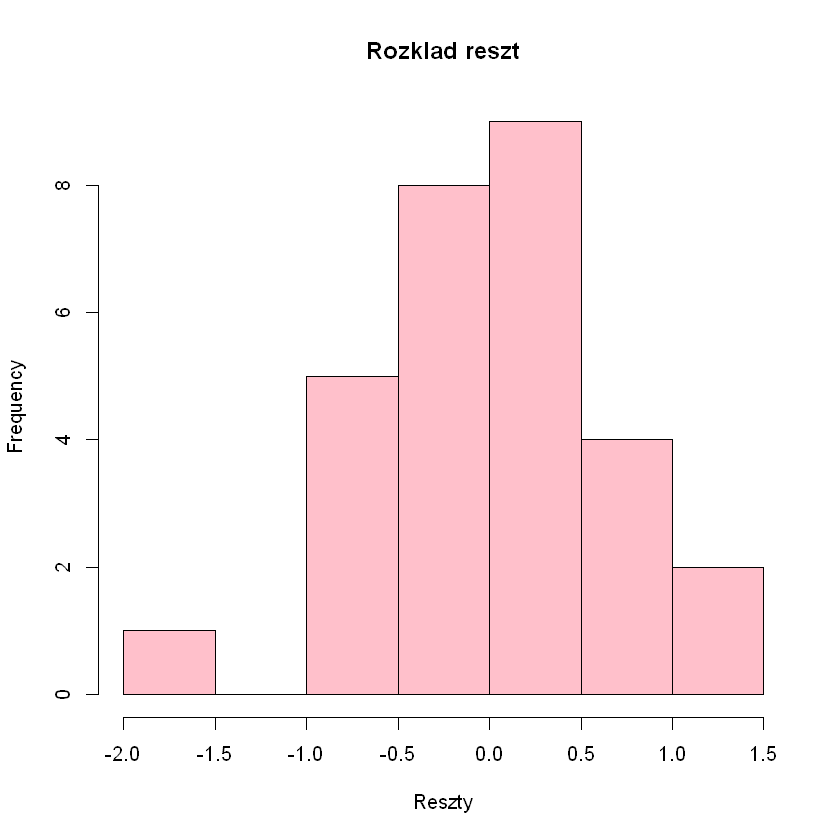

In [188]:
ehat1 <- mmm_5$residuals
ehat1
#jarque.bera.test(ehat)
hist(ehat1, main = "Rozklad reszt", col = "pink", xlab="Reszty")

In [189]:
ehat<-as.data.frame(ehat)
ehat$ehat<-as.vector(ehat$ehat)
head(ehat)

,ehat
3,0.2066081
5,-1.9669151
9,-0.2433061
16,-0.2050881
19,0.8099638
21,0.3630899


In [190]:
ehat1<-as.data.frame(ehat)
ehat1$ehat<-as.vector(ehat1$ehat)
head(ehat1)

,ehat
3,0.2066081
5,-1.9669151
9,-0.2433061
16,-0.2050881
19,0.8099638
21,0.3630899


In [191]:
jarque.test(ehat$ehat)


	Jarque-Bera Normality Test

data:  ehat$ehat
JB = 1.9401, p-value = 0.3791
alternative hypothesis: greater


In [192]:
jarque.test(ehat1$ehat)


	Jarque-Bera Normality Test

data:  ehat1$ehat
JB = 1.9401, p-value = 0.3791
alternative hypothesis: greater


Zatem Na poziomie istotności ∝ = 0,05 nie ma podstaw do odrzucenia  hipotezy zerowej, mówiącej o normalności składnika losowego

<h2>Czy wystepuje u nas heteroskedastycznosc?<h2>

In [193]:
bptest(mmm_4)


	studentized Breusch-Pagan test

data:  mmm_4
BP = 10.922, df = 6, p-value = 0.09083


In [194]:
bptest(mmm_5)


	studentized Breusch-Pagan test

data:  mmm_5
BP = 10.737, df = 6, p-value = 0.09687


<h3>Test Breuscha-Pagana<h3>

test Breuscha-Pagana, który polega na oszacowaniu równania regresji, w którym zmienną objaśniającą jest kwadrat reszt podzielonych przez odchylenie standardowe.

𝐻0:𝑆𝑘ł𝑎𝑑𝑛𝑖𝑘⁡𝑙𝑜𝑠𝑜𝑤𝑦⁡𝑗𝑒𝑠𝑡⁡ℎ𝑜𝑚𝑜𝑠𝑘𝑒𝑑𝑎𝑠𝑡𝑦𝑐𝑧𝑛𝑦. 
𝐻1:𝑆𝑘ł𝑎𝑑𝑛𝑖𝑘⁡𝑙𝑜𝑠𝑜𝑤𝑦⁡𝑗𝑒𝑠𝑡⁡ℎ𝑒𝑡𝑒𝑟𝑜𝑠𝑘𝑒𝑑𝑎𝑠𝑡𝑦𝑐𝑧𝑛𝑦. 

W programie R korzystam z bptest, dostępnego w pakiecie lmtest.

Przy poziomie istotności ∝ = 0,05 nie ma powodu do odrzucenia  hipotezy zerowej, mówiącej o homoskedastyczności składnika losowego. Nie występuje więc problem heteroskedastyczności.W obu modelach.


<h2>To w koncu od czego najbardziej zalezy sprzedaz?Interpretacja istotnych wspolczynniko<h2>

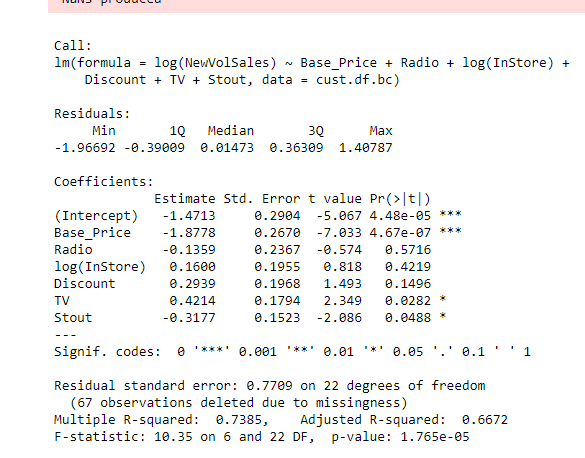

InStore:
Jesli zwiekszymy promocje w sklepie o jeden procent spodzieqmy sie wzrostu sprzedazy o 0,16%
Base_Pirice
Jesli zmienimy cene o 1 euro(badz inna walute),bedziemy oczekiwac ze nazs sprzedaz spadnie o 187%
TV
Jesli zwiekszymy promocje w TV o jednostke(np. o dany okres czasu wiecej w TV ),sprzedaz wzrosnie o 42%

Stout-wskaznik wyczerpania zapasow

Jesli nasze zapasy zmniejsza sie raz(o 100%), to nasz sprzedaz spadnie o 32%.


<h3>Model z adstockiem<h3>

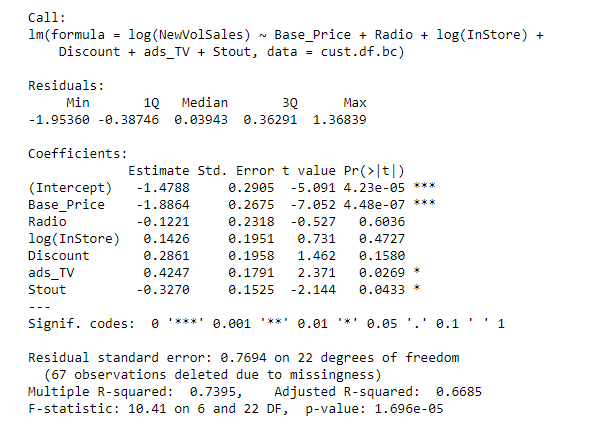

Jesli zwiekszymi nasz adstock w TV o jednostke (np. dodamy reklame w lepszym pasmie czasowym) , to sprzedaz wzrosnie o 42%

<h2>Spostrzezenia<h2>

* w wielu przetestowanych modelach zmienna Radio nie chce wejsc do modelu-jest nieistotna staystycznie oraz wskazuje przeciwny kierunek do
spodziewanego-tzn. ze wplywa negatywnie na sprzedaz naszego produktu. Z pewnoscia nalezaloby zebrac jesczed wiecej danych i rozwazyc jescze kilka modeli.